In [8]:
import os
import cv2
import imghdr

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'./input_for_model/validation/'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
        os.remove(bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  AC
processing class directory  RS
 no improper image files were found


In [1]:
#deci asta e partea de preprocesare
import os
import shutil
import random
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow

train_imagedatagenerator = ImageDataGenerator(rescale=1/255.0)
validation_imagedatagenerator = ImageDataGenerator(rescale=1/255.0)

train_iterator = train_imagedatagenerator.flow_from_directory(
    './input_for_model/train',
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary')

validation_iterator = validation_imagedatagenerator.flow_from_directory(
    './input_for_model/validation',
    target_size=(150, 150),
    batch_size=10,
    class_mode='binary')


Found 1742 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


In [12]:



model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=keras.losses.BCE, metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 32)      

In [13]:
from PIL import Image


history = model.fit(train_iterator,
                    validation_data=validation_iterator,
                    steps_per_epoch=10,
                    epochs=4,
                    validation_steps=10)

Epoch 1/4
10/10 [==============================] - 4s 395ms/step - loss: 0.5982 - accuracy: 0.7040 - val_loss: 0.2582 - val_accuracy: 1.0000


KeyboardInterrupt: 

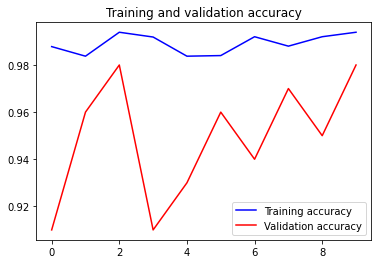

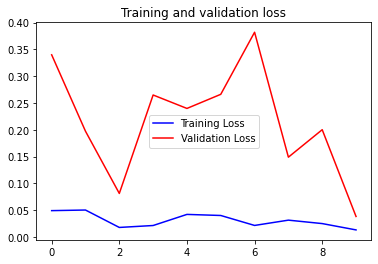

In [18]:
import matplotlib.pyplot as plt

def plot_result(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


plot_result(history)

In [19]:


model.save("modelxdold")



INFO:tensorflow:Assets written to: modelxdold\assets


In [2]:

import tensorflowjs
import keras

model = keras.models.load_model("modelxdold")


tensorflowjs.converters.save_keras_model(model, 'modelxdoldjs')

In [14]:
import tensorflow as tf
import numpy as np
import scipy
from keras.preprocessing.image import ImageDataGenerator
def load_and_predict():


    test_generator = ImageDataGenerator(rescale=1. / 255)

    test_iterator = test_generator.flow_from_directory(
        "./input_test1",
        target_size=(150, 150),
        shuffle=False,
        class_mode='binary',
        batch_size=1)

    ids = []
    for filename in test_iterator.filenames:
        ids.append(filename)

    predict_result = model.predict(test_iterator, steps=len(test_iterator.filenames))
    predictions = []
    for prediction in enumerate(predict_result):
        print(prediction[0], end = '\t')
        if (prediction[1] > 0.5):
            print ('rainbow six' + str((prediction[1] - 0.5)/0.5*100) + '%')
        else:
            print ('assassins creed' + str((0.5-prediction[1])/0.5*100) + '%')

    return
 

load_and_predict()


Found 6 images belonging to 1 classes.
0	rainbow six[85.70809]%
1	rainbow six[100.]%
2	rainbow six[99.96797]%
3	assassins creed[99.757385]%
4	assassins creed[99.60146]%
5	assassins creed[100.]%
